In [24]:
!pip install qiskit
import qiskit as qk
#from qiskit import IBMQ,Aer

%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
#provider = IBMQ.load_account()

In [25]:
import Qconfig_IBMQ_experience
IBMQ.save_account(Qconfig_IBMQ_experience.APItoken, overwrite=True)
IBMQ.load_account()

C:\Users\Mike\anaconda3\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
ibmqfactory.load_account:WARNING:2020-09-20 07:11:04,153: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [31]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(5, 'q')
creg_c = ClassicalRegister(5, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.h(qreg_q[0])
circuit.x(qreg_q[1])
circuit.cx(qreg_q[1], qreg_q[0])
circuit.h(qreg_q[0])
circuit.x(qreg_q[1])
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.x(qreg_q[0])
circuit.x(qreg_q[1])
circuit.h(qreg_q[0])
circuit.cx(qreg_q[1], qreg_q[0])
circuit.h(qreg_q[0])
circuit.x(qreg_q[1])
circuit.x(qreg_q[0])
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])

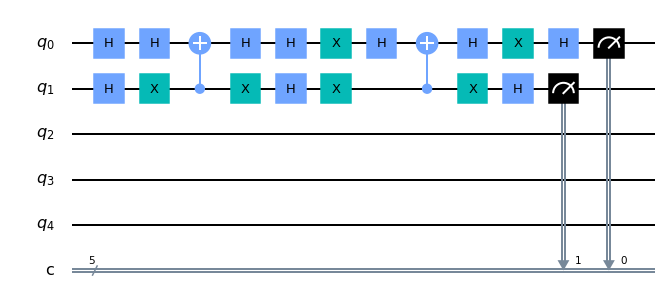

In [32]:
circuit.draw(output='mpl')

In [20]:
my_provider = IBMQ.get_provider()
my_provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_valencia') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [39]:
my_provider = IBMQ.get_provider(hub='ibm-q')
my_provider.backends()

from qiskit.providers.ibmq import least_busy

small_devices = my_provider.backends(filters=lambda x: x.configuration().n_qubits == 5
                                   and not x.configuration().simulator)
least_busy(small_devices)

<IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>

In [6]:
my_provider = IBMQ.get_provider()
#backend  = my_provider.get_backend('ibmq_ourense')
#backend  = my_provider.get_backend('ibmq_qasm_simulator')
#backend=Aer.get_backend('qasm_simulator')

In [36]:
backend=Aer.get_backend('qasm_simulator')
jobIBM=qk.execute(circuit,backend=backend,shots=1024)
resultSim=jobIBM.result()

In [37]:
backend  = my_provider.get_backend('ibmqx2')
jobIBM=qk.execute(circuit,backend=backend,shots=1024)
resultExp=jobIBM.result()

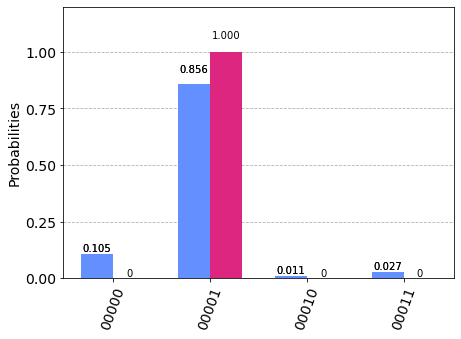

In [38]:
from qiskit.tools.visualization import plot_histogram
plot_histogram([resultExp.get_counts(circuit),resultSim.get_counts(circuit)])